In [1]:
import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
data_houses = pd.read_csv('/content/California_Houses.csv')

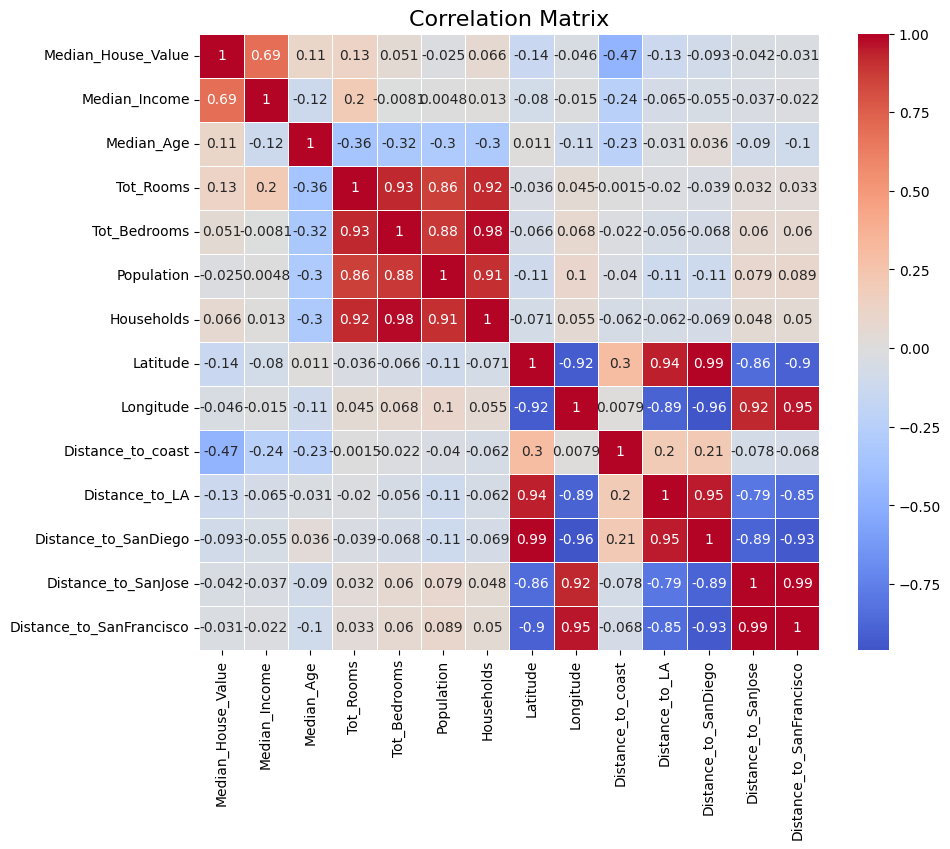

In [ ]:
df_houses = pd.DataFrame(data_houses)

correlation_matrix_houses = df_houses.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_houses,
            annot=True,
            cmap="coolwarm",
            center=0,
            linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

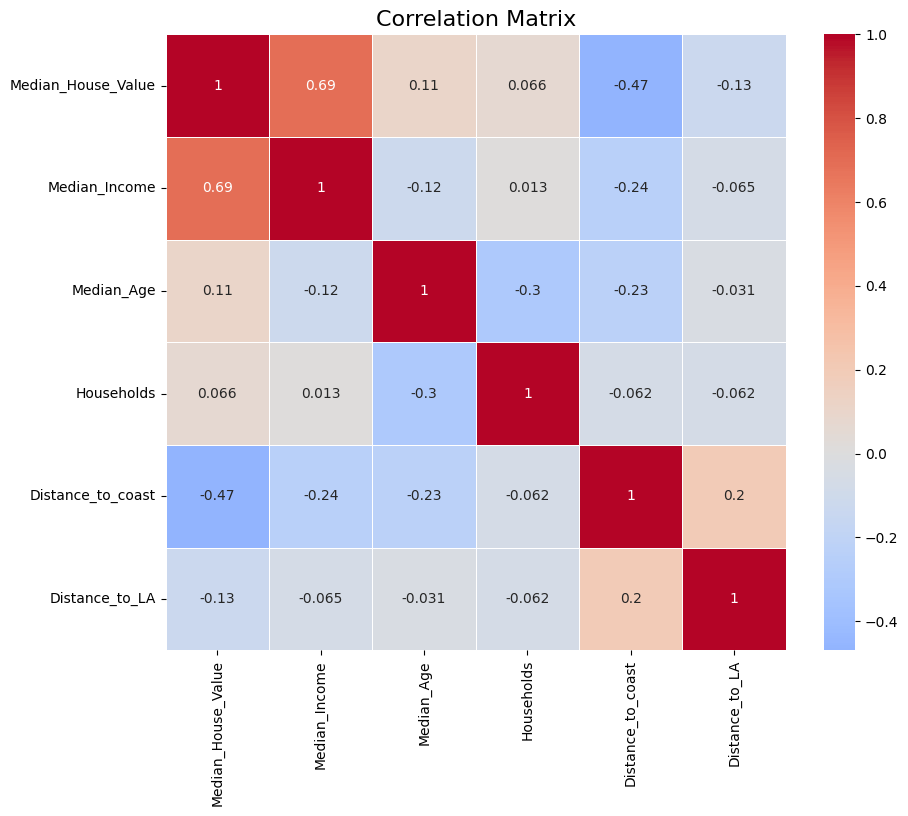

In [ ]:
df_houses_filted = df_houses.drop(columns=['Tot_Bedrooms', 'Tot_Rooms', 'Population', 'Longitude', 'Latitude', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'])

correlation_matrix_houses_fillted = df_houses_filted.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_houses_fillted,
            annot=True,
            cmap="coolwarm",
            center=0,
            linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
X = df_houses_filted.drop(columns='Median_House_Value')
y = df_houses['Median_House_Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class LinearRegressionMatrix:
    def __init__(self, lr=0.01, n_iters=1000, l1=0.01, l2=0.01):

        self.lr = lr
        self.n_iters = n_iters
        self.l1 = l1
        self.l2 = l2
        self.weights = None
        self.bias = None


        self.history_mse = []
        self.history_rmse = []
        self.history_mae = []

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
          y_pred = np.dot(X, self.weights) + self.bias

          error = y_pred - y

          dw = (2 / n_samples) * np.dot(X.T, error)
          db = (2 / n_samples) * np.sum(error)

          if self.l1 > 0:
            dw += self.l1 * np.sign(self.weights)

          if self.l2 > 0:
            dw += 2 * self.l2 * self.weights


          self.weights -= self.lr * dw
          self.bias -= self.lr * db

          mse = np.mean(error**2)
          rmse = np.sqrt(mse)
          mae = np.mean(np.abs(error))

          self.history_mse.append(mse)
          self.history_rmse.append(rmse)
          self.history_mae.append(mae)

    def predict(self, X):
        X = np.array(X, dtype=float)
        return np.dot(X, self.weights) + self.bias

In [ ]:
X_mean, X_std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_std[X_std == 0] = 1
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

y_mean, y_std = np.mean(y_train), np.std(y_train)
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

In [ ]:
models = {
    "Без регуляризации": LinearRegressionMatrix(lr=0.01, n_iters=1000, l1=0.0, l2=0.0),
    "L1": LinearRegressionMatrix(lr=0.01, n_iters=1000, l1=0.01, l2=0.0),
    "L2": LinearRegressionMatrix(lr=0.01, n_iters=1000, l1=0.0, l2=0.01),
    "ElasticNet": LinearRegressionMatrix(lr=0.01, n_iters=1000, l1=0.01, l2=0.01)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled)
    results.append({
        'Модель': name,
        'MSE': model.history_mse[-1],
        'RMSE': model.history_rmse[-1],
        'MAE': model.history_mae[-1]
    })

df_results = pd.DataFrame(results)
df_results = df_results[['Модель', 'MSE', 'RMSE', 'MAE']]
df_results = round(df_results, 4)
print(df_results)

              Модель     MSE    RMSE     MAE
0  Без регуляризации  0.4067  0.6377  0.4740
1                 L1  0.4068  0.6378  0.4736
2                 L2  0.4068  0.6378  0.4741
3         ElasticNet  0.4070  0.6380  0.4738


In [ ]:
def plot_histories_lin(histories, metric_name, zoom=False):
  min_val = min(min(hist) for hist in histories.values())
  max_val = max(max(hist) for hist in histories.values())

  plt.figure(figsize=(14,8))
  plt.subplot(1, 2, 1)
  for name, losses in histories.items():
    plt.plot(losses, label=name)
  plt.title(f"{metric_name} по итерациям")
  plt.xlabel("Итерация")
  plt.ylabel(metric_name)
  plt.legend()
  plt.grid(True)


  plt.subplot(1, 2, 2)
  for name, losses in histories.items():
      plt.plot(losses, label=name)
  plt.title(f"{metric_name} по итерациям")
  plt.xlabel("Итерация")
  plt.ylabel(metric_name)
  if zoom:
    plt.ylim(min_val * 0.99, min_val * 1.01)
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

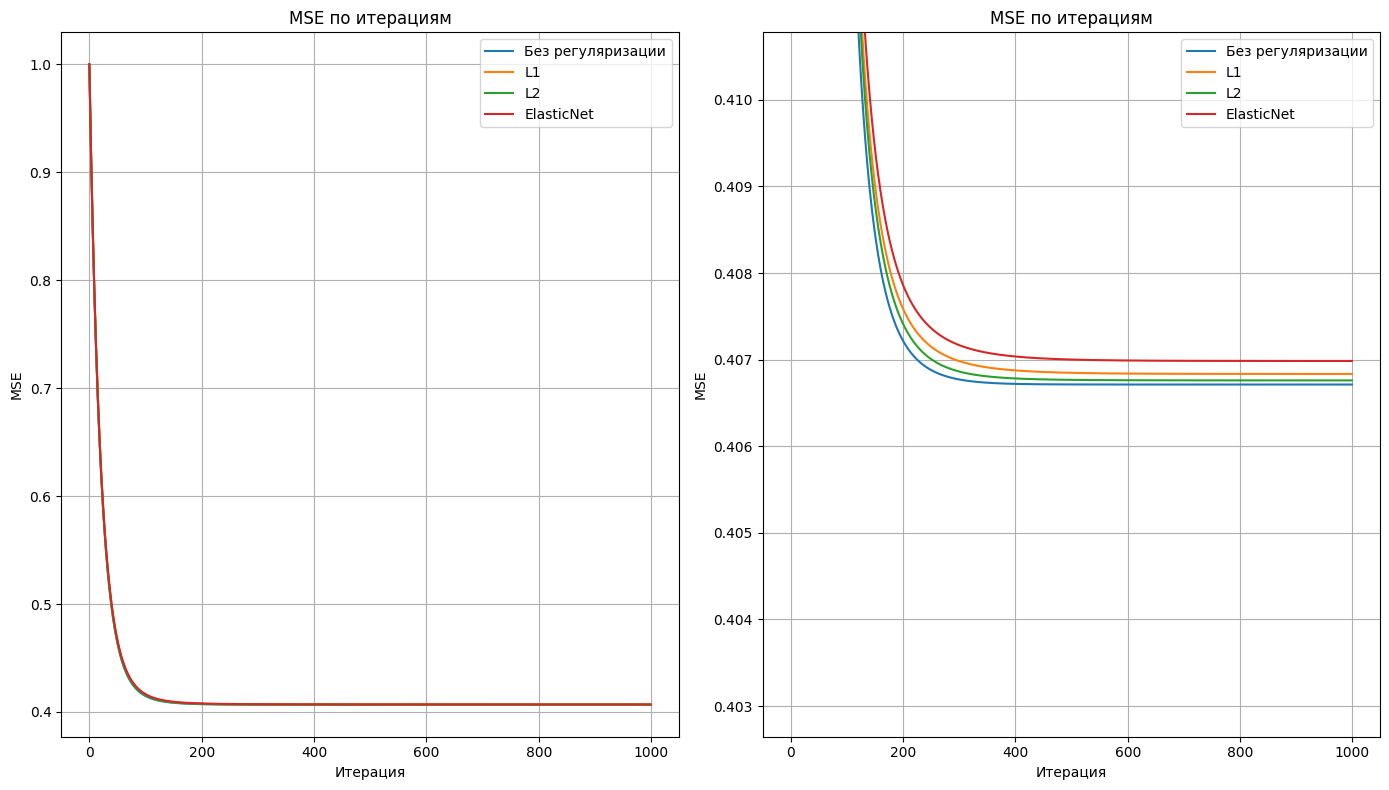

In [ ]:
histories_mse = {name: model.history_mse for name, model in models.items()}
plot_histories_lin(histories_mse, metric_name="MSE", zoom=True)

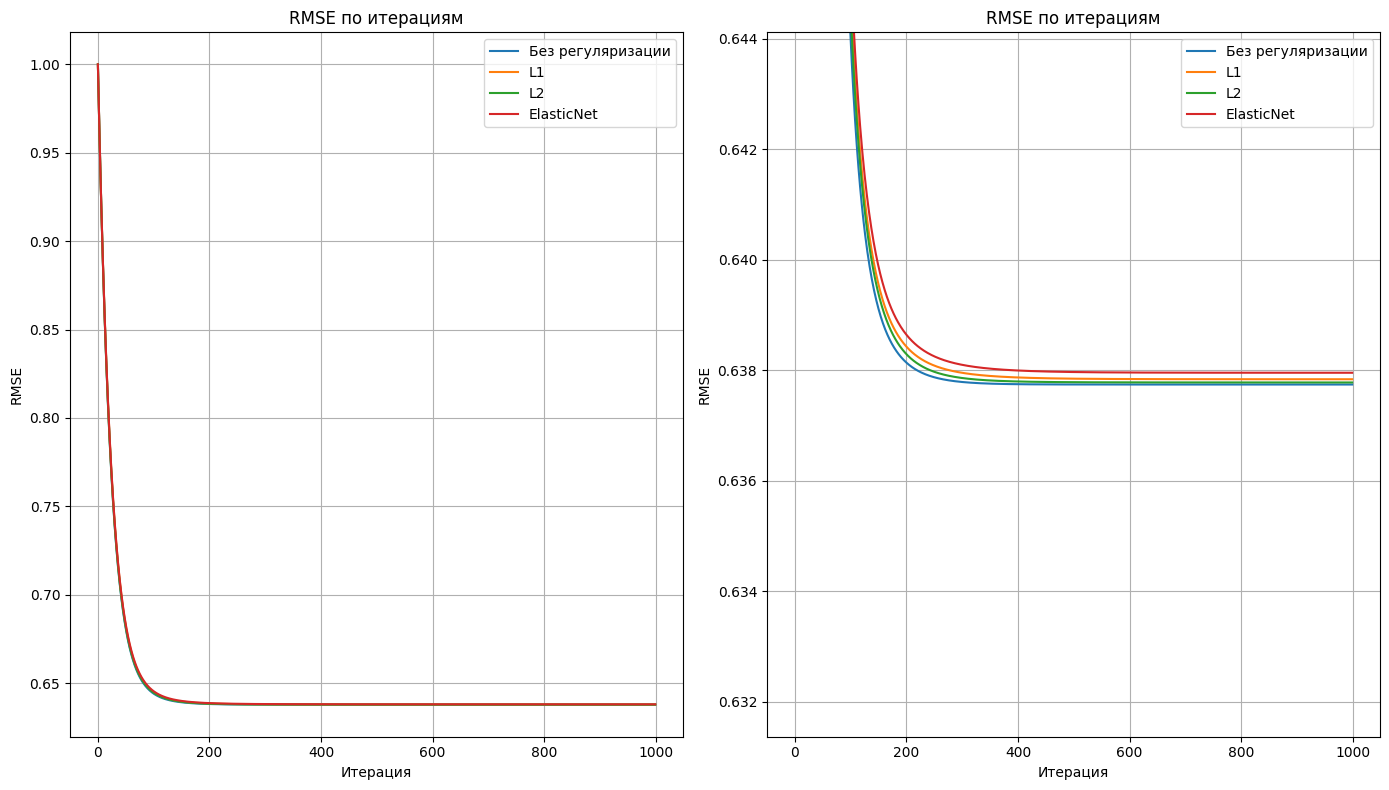

In [ ]:
histories_rmse = {name: model.history_rmse for name, model in models.items()}
plot_histories_lin(histories_rmse, metric_name="RMSE", zoom=True)

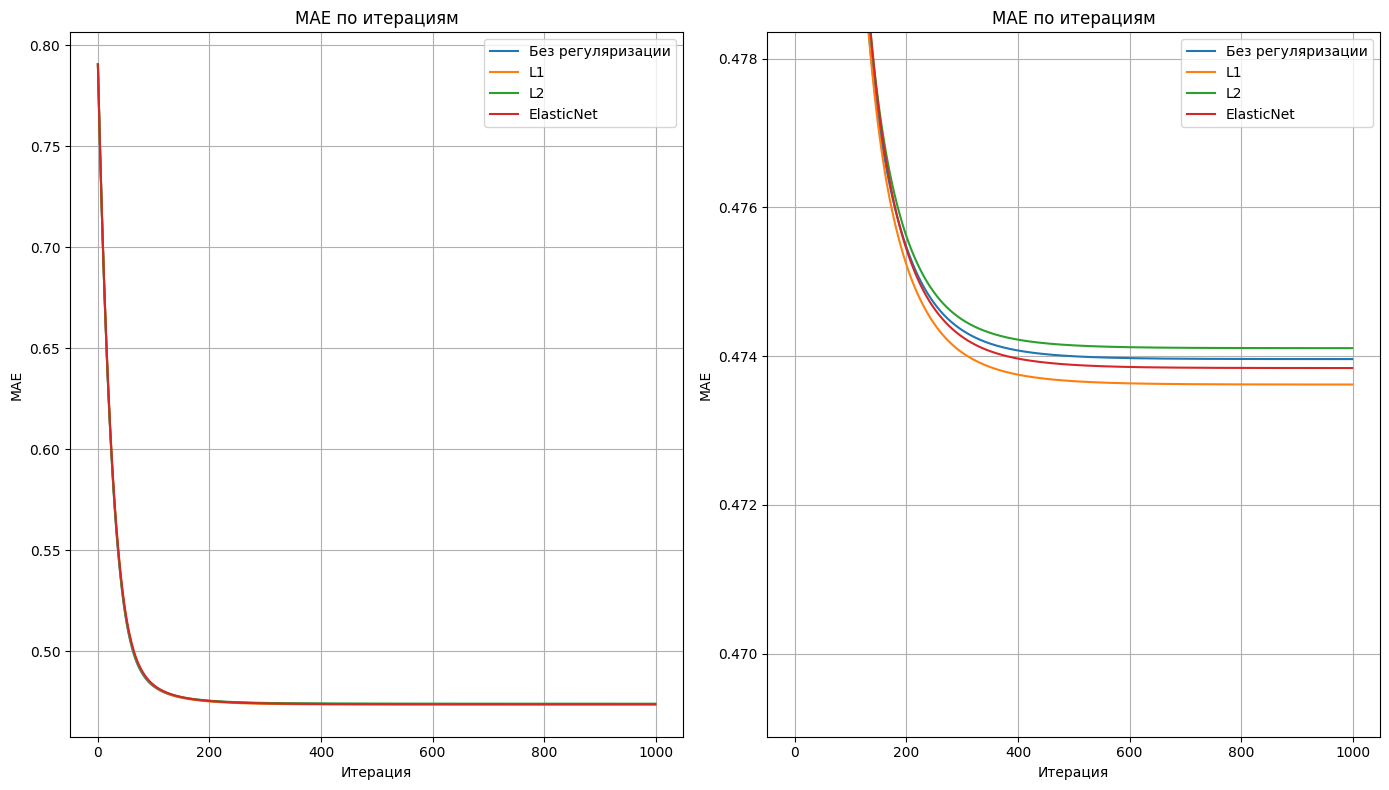

In [ ]:
histories_mae = {name: model.history_mae for name, model in models.items()}
plot_histories_lin(histories_mae, metric_name="MAE", zoom=True)

In [ ]:
data_titanic = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df_titanic = pd.DataFrame(data_titanic).drop(columns=['Name', 'Ticket', 'Cabin'])

df_titanic_encoded = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'], dtype=int)

missing_count = df_titanic_encoded.replace('', np.nan).isna().sum()
df_titanic_encoded.replace('', np.nan, inplace=True)

# Заменяем NaN на среднее значение каждого столбца
df_titanic_mean = df_titanic_encoded.apply(lambda col: col.fillna(col.mean()) if col.dtype in [np.float64, np.int64] else col)
df_titanic_mean



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


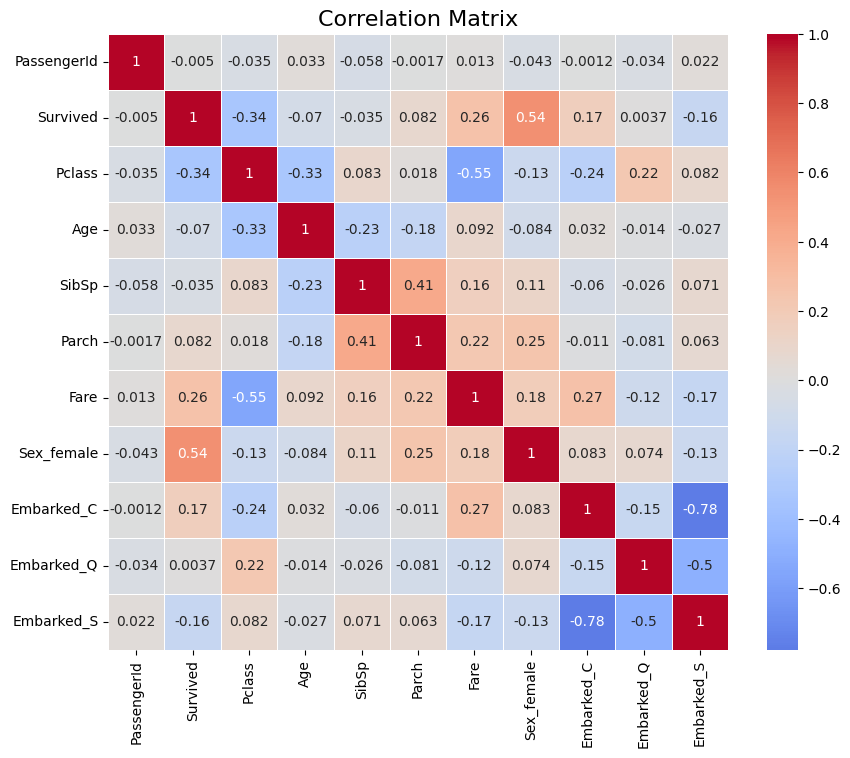

In [ ]:
df_titanic_mean_fillted = df_titanic_mean.drop(columns='Sex_male')

correlation_matrix_titanic = df_titanic_mean_fillted.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_titanic,
            annot=True,
            cmap="coolwarm",
            center=0,
            linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:

X = df_titanic_mean_fillted.drop(columns=['Survived', 'PassengerId', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
y = df_titanic_mean_fillted['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
class LogisticRegressionMatrix:
    def __init__(self, lr=0.01, n_iters=1000, l1=0.01, l2=0.01):
        self.lr = lr
        self.n_iters = n_iters
        self.l1 = l1
        self.l2 = l2
        self.weights = None
        self.bias = None

        self.history_loss = []
        self.history_acc = []
        self.history_f1 = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)

            err = y_pred - y

            dw = np.dot(X.T, err) / n_samples
            db = np.sum(err) / n_samples

            if self.l1 > 0:
              dw += self.l1 * np.sign(self.weights)

            if self.l2 > 0:
              dw += 2 * self.l2 * self.weights

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            eps = 1e-15
            y_pred_clipped = np.clip(y_pred, eps, 1 - eps)
            loss = -np.mean(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            self.history_loss.append(loss)

            preds = (y_pred >= 0.5).astype(int)
            acc = accuracy_score(y, preds)
            f1 = f1_score(y, preds)
            self.history_acc.append(acc)
            self.history_f1.append(f1)


    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [ ]:
models = {
    "Без регуляризации": LogisticRegressionMatrix(lr=0.01, n_iters=1000, l1=0.0, l2=0.0),
    "L1": LogisticRegressionMatrix(lr=0.01, n_iters=1000, l1=0.01, l2=0.0),
    "L2": LogisticRegressionMatrix(lr=0.01, n_iters=1000, l1=0.0, l2=0.01),
    "ElasticNet": LogisticRegressionMatrix(lr=0.01, n_iters=1000, l1=0.01, l2=0.01)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    results.append({
        'Модель': name,
        'Log-loss': model.history_loss[-1],
        'Accuracy': model.history_acc[-1],
        'F1-score': model.history_f1[-1]
    })

df_results = pd.DataFrame(results)
df_results = df_results[['Модель', 'Log-loss', 'Accuracy', 'F1-score']]
df_results = round(df_results, 4)
print(df_results)

              Модель  Log-loss  Accuracy  F1-score
0  Без регуляризации    0.4617    0.7921    0.7121
1                 L1    0.4671    0.7921    0.7154
2                 L2    0.4660    0.7935    0.7135
3         ElasticNet    0.4719    0.7879    0.7079


In [ ]:
def plot_histories_log(histories, metric_name, zoom=False, minimum=True):
  min_val = min(min(hist) for hist in histories.values())
  max_val = max(max(hist) for hist in histories.values())

  plt.figure(figsize=(18,6))
  plt.subplot(1, 2, 1)
  for name, losses in histories.items():
    plt.plot(losses, label=name)
  plt.title(f"{metric_name} по итерациям")
  plt.xlabel("Итерация")
  plt.ylabel(metric_name)
  plt.legend()
  plt.grid(True)


  plt.subplot(1, 2, 2)
  for name, losses in histories.items():
      plt.plot(losses, label=name)
  plt.title(f"{metric_name} по итерациям")
  plt.xlabel("Итерация")
  plt.ylabel(metric_name)
  if zoom and minimum:
    plt.ylim(min_val * 0.97, min_val * 1.12)
  if zoom and (not minimum):
    plt.ylim(max_val * 0.93, max_val * 1.02)
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

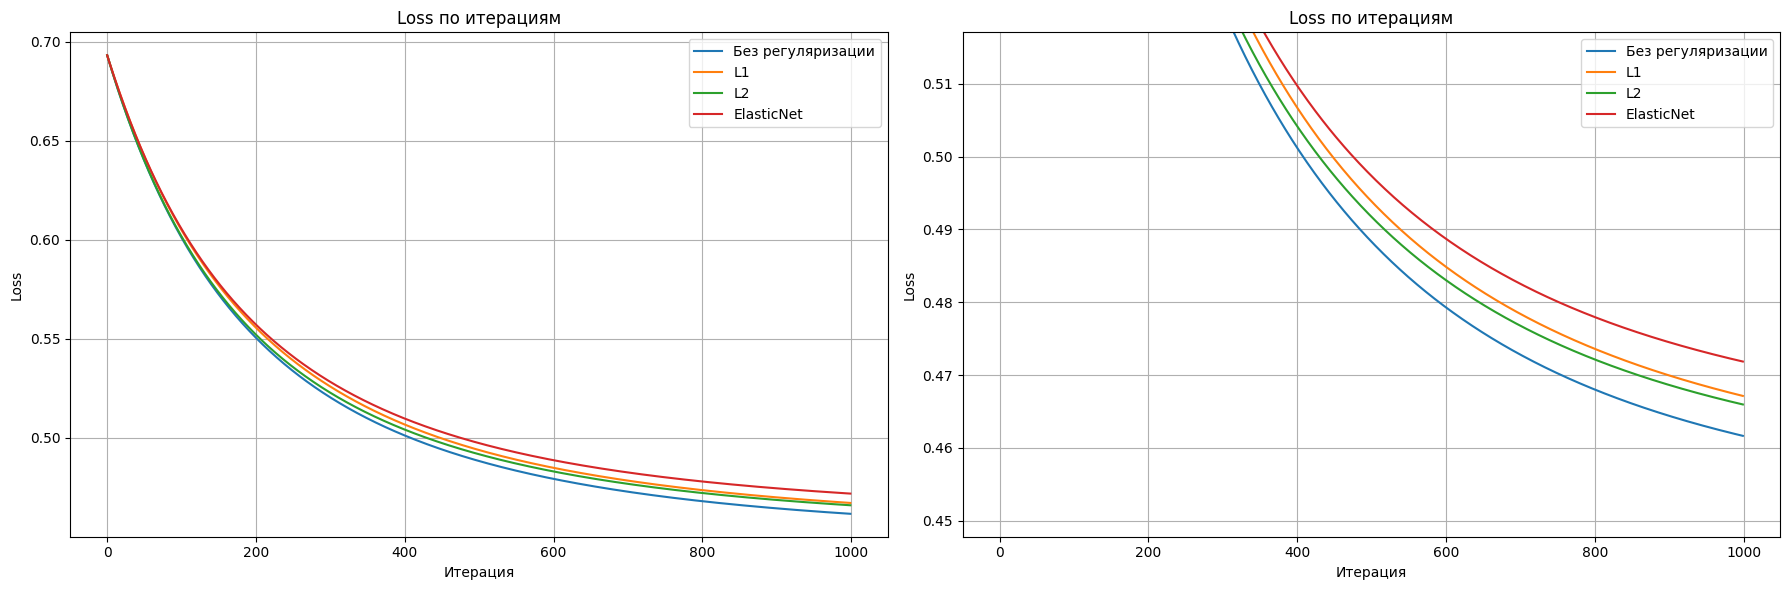

In [ ]:
histories_loss = {name: model.history_loss for name, model in models.items()}
plot_histories_log(histories_loss, metric_name="Loss", zoom=True, minimum=True)

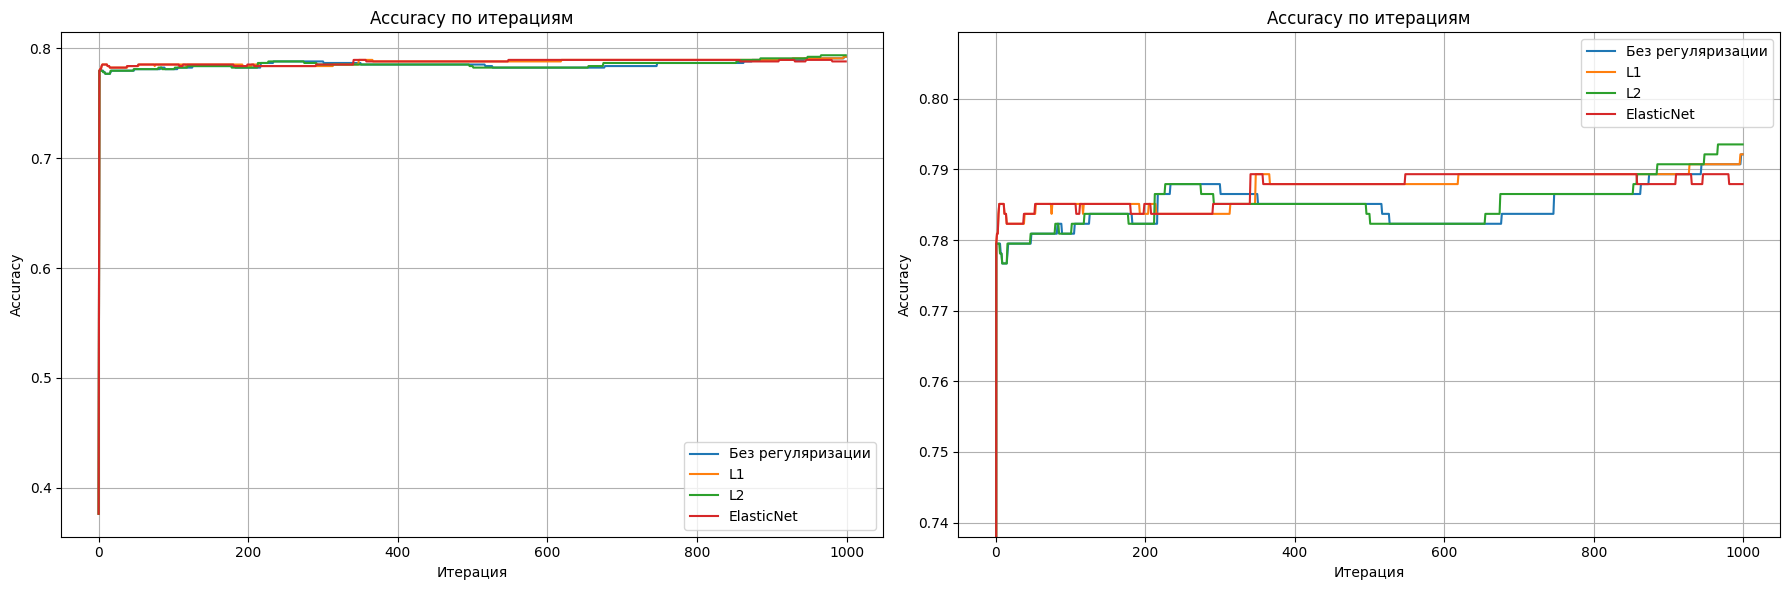

In [ ]:
histories_acc = {name: model.history_acc for name, model in models.items()}
plot_histories_log(histories_acc, metric_name="Accuracy", zoom=True, minimum=False)

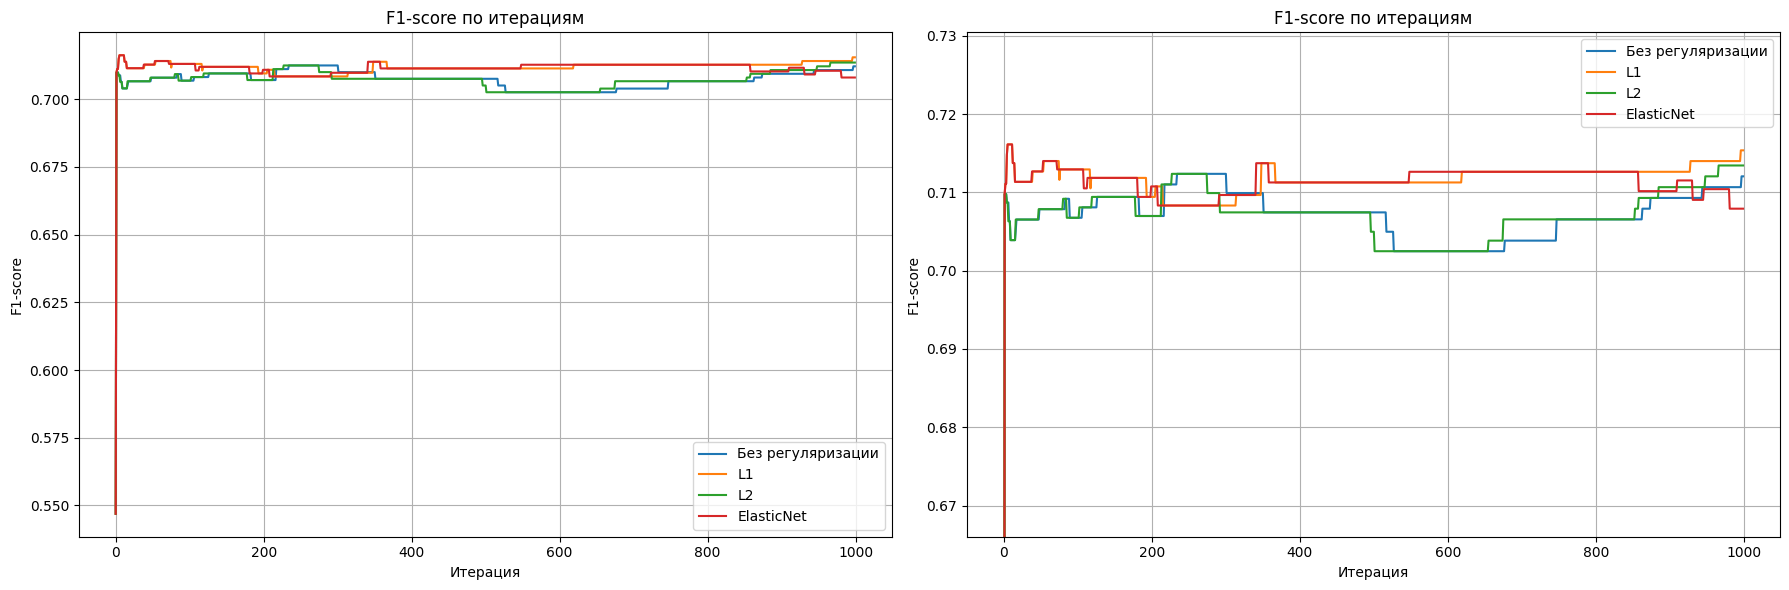

In [ ]:
histories_f1 = {name: model.history_f1 for name, model in models.items()}
plot_histories_log(histories_f1, metric_name="F1-score", zoom=True, minimum=False)

In [10]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

X_train = train.drop('label', axis=1).values.astype('float') / 255.0
y_train = train['label'].values.astype('int')

X_test = test.drop('label', axis=1).values.astype('float') / 255.0
y_test = test['label'].values.astype('int')

In [7]:
data = pd.read_csv('/content/insurance.csv')
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

X = data.drop('charges', axis=1)
y = data['charges'].values.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [11]:
class KNearestNeighbors:
  def __init__(self, n_neighbors=5, regression=True):
    self.n_neighbors = n_neighbors
    self.regression = regression

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def euclidean_distances(self, x):
    return np.sqrt(np.sum((self.X_train - x)**2, axis=1))

  def make_prediction(self, x):
    distances = self.euclidean_distances(x)
    k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
    d = distances[k_nearest_indexes]
    y = self.y_train[k_nearest_indexes]

    weights = np.exp(-d)

    if self.regression:
      return np.sum(weights * y) / np.sum(weights)
    else:
      class_votes = {}
      for label, w in zip(y, weights):
          class_votes[label] = class_votes.get(label, 0) + w
      return max(class_votes, key=class_votes.get)

  def predict(self, X_test):
    return np.array([self.make_prediction(x) for x in X_test])

Лучшее k по минимальной MSE: 7, MSE = 0.1940


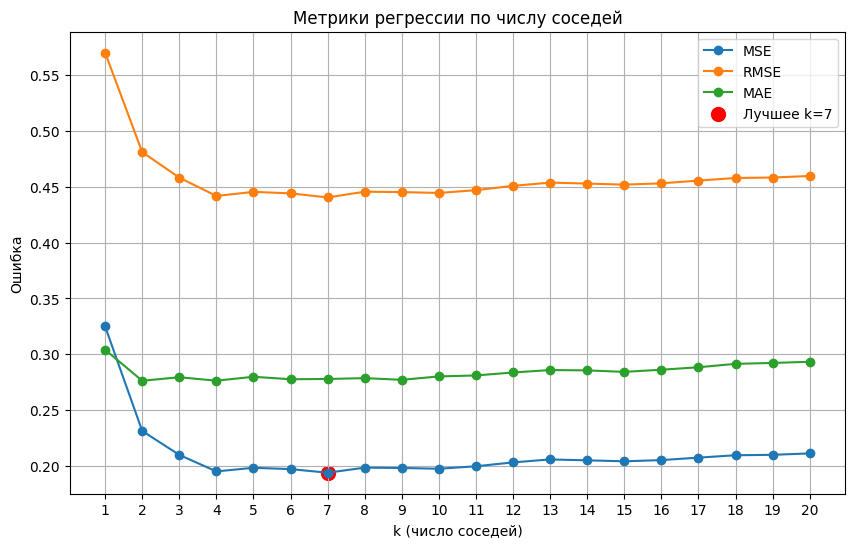

In [10]:
k_values = list(range(1, 21))
mse_list, rmse_list, mae_list = [], [], []

for k in k_values:
    knn_reg = KNearestNeighbors(n_neighbors=k, regression=True)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)

best_k_index = np.argmin(mse_list)
best_k = k_values[best_k_index]
print(f"Лучшее k по минимальной MSE: {best_k}, MSE = {mse_list[best_k_index]:.4f}")

plt.figure(figsize=(10,6))
plt.plot(k_values, mse_list, label='MSE', marker='o')
plt.plot(k_values, rmse_list, label='RMSE', marker='o')
plt.plot(k_values, mae_list, label='MAE', marker='o')
plt.xlabel('k (число соседей)')
plt.ylabel('Ошибка')
plt.title('Метрики регрессии по числу соседей')
plt.legend()
plt.grid(True)
plt.xticks(k_values)

plt.scatter(best_k, mse_list[best_k_index], color='red', s=100, label=f'Лучшее k={best_k}')
plt.legend()
plt.show()


Лучшее k по максимальному F1: 6, F1 = 0.8651


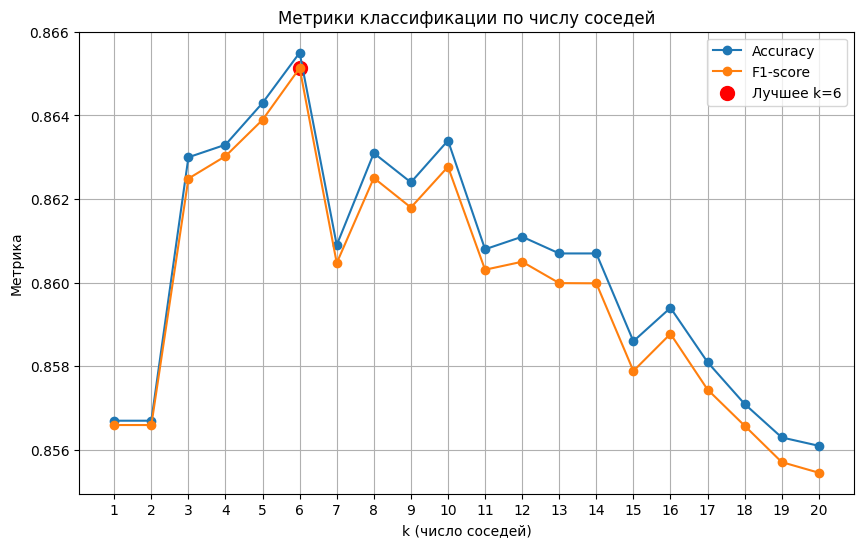

In [12]:
k_values = list(range(1, 21))
accuracy_list, f1_list = [], []

for k in k_values:
    knn_class = KNearestNeighbors(n_neighbors=k, regression=False)
    knn_class.fit(X_train, y_train)
    y_pred = knn_class.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_list.append(acc)
    f1_list.append(f1)

best_k_index = np.argmax(f1_list)
best_k = k_values[best_k_index]
print(f"Лучшее k по максимальному F1: {best_k}, F1 = {f1_list[best_k_index]:.4f}")

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy_list, label='Accuracy', marker='o')
plt.plot(k_values, f1_list, label='F1-score', marker='o')
plt.xlabel('k (число соседей)')
plt.ylabel('Метрика')
plt.title('Метрики классификации по числу соседей')
plt.legend()
plt.grid(True)
plt.xticks(k_values)

plt.scatter(best_k, f1_list[best_k_index], color='red', s=100, label=f'Лучшее k={best_k}')
plt.legend()
plt.show()
